In [1]:
#import pandas as pd 
#df_consumer_product = pd.read_excel("consumer_product.xlsx")
#df_sold_plan = pd.read_excel("sold_plan.xlsx")

In [ ]:
import pandas as pd
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host='52.66.79.237',
    database='servify_assignment',
    user='candidate',
    password='asdfgh123')

In [ ]:
df_sold_plan = pd.read_sql_query(
"SELECT * from sold_plan",
conn)

In [ ]:
df_consumer_product = pd.read_sql_query(
    "SELECT * from consumer_product",
    conn)

In [5]:
df_consumer_product.head(2)
df_sold_plan.head(2)

,SoldPlanID,PlanID,PlanAmount,FulfillerID,ConsumerProductID,ConsumerID,DateOfPurchase,DateOfActivation,ValidityDate,Status,Source,CreatedDate
0,183,19,1299,1,2289116,597286,2018-05-17 11:37:11,2018-05-25 06:46:54,2018-12-05,0,Store,2018-05-23 22:57:34
1,227,18,1499,1,13313689,655779,2018-04-29 20:22:46,2018-05-03 19:35:08,2017-12-04,1,Web,2018-05-17 06:27:03


# Exploring the Data

In [7]:
df_consumer_product.head(2)
df_consumer_product.info()
df_sold_plan.head(2)
df_sold_plan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50575 entries, 0 to 50574
Data columns (total 11 columns):
ConsumerProductID    50575 non-null int64
ConsumerID           50575 non-null int64
BrandID              50575 non-null int64
ProductID            50575 non-null int64
IMEI1                50575 non-null int64
IMEI2                50575 non-null int64
SerialNo             50575 non-null object
DateOfPurchase       50575 non-null datetime64[ns]
WarrantyTill         50575 non-null datetime64[ns]
IsActive             50575 non-null int64
CreatedDate          50575 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(7), object(1)
memory usage: 4.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23215 entries, 0 to 23214
Data columns (total 12 columns):
SoldPlanID           23215 non-null int64
PlanID               23215 non-null int64
PlanAmount           23215 non-null int64
FulfillerID          23215 non-null int64
ConsumerProductID    23215 non-null int64
ConsumerID   

# Summarization of Data Statistically
No missing values found

In [8]:
df_consumer_product.describe()
df_sold_plan.describe()

,SoldPlanID,PlanID,PlanAmount,FulfillerID,ConsumerProductID,ConsumerID,Status
count,2.321500e+04,23215.000000,23215.000000,23215.0,2.321500e+04,23215.000000,23215.000000
mean,9.993116e+05,9.986000,1348.950463,1.0,1.002056e+07,501018.936463,0.232393
std,5.750154e+05,5.474269,228.041644,0.0,5.777678e+06,287227.354238,2.165259
min,1.830000e+02,1.000000,999.000000,1.0,2.305000e+03,56.000000,-3.000000
25%,5.035295e+05,5.000000,1299.000000,1.0,5.013360e+06,255174.500000,-3.000000
50%,9.996500e+05,10.000000,1299.000000,1.0,1.004843e+07,498297.000000,0.000000
75%,1.498953e+06,15.000000,1499.000000,1.0,1.502322e+07,749913.500000,1.000000
max,1.999999e+06,19.000000,1599.000000,1.0,1.999927e+07,999966.000000,3.000000


In [9]:
#Merging two data frames df_consumer_product & df_sold_plan
df_merged = pd.merge(df_consumer_product, df_sold_plan, on='ConsumerID',how='inner')

In [10]:
df_merged.head(5)

,ConsumerProductID_x,ConsumerID,BrandID,ProductID,IMEI1,IMEI2,SerialNo,DateOfPurchase_x,WarrantyTill,IsActive,...,PlanID,PlanAmount,FulfillerID,ConsumerProductID_y,DateOfPurchase_y,DateOfActivation,ValidityDate,Status,Source,CreatedDate_y
0,2305,904329,81,911,840343632183828,927619086584227,DS7YD25138N9N,2017-09-10,2018-09-10,1,...,12,999,1,2305,2018-04-22 03:54:02,2018-04-29 11:05:46,2018-09-10,1,Store,2018-05-08 22:22:55
1,4083,860497,21,358,150876878891545,576523728858407,6RO8Y347D0R1T,2016-08-03,2017-08-03,1,...,2,1499,1,4083,2017-12-06 15:33:41,2018-03-07 05:47:39,2017-08-03,1,App,2018-01-29 06:00:15
2,4412,990148,75,180,556628322411947,835549662536309,RNX8CIPP544SQ,2016-12-09,2017-12-09,1,...,16,1499,1,4412,2017-02-26 15:30:10,2017-09-06 21:20:17,2017-12-09,-3,Web,2018-05-18 22:18:13
3,5730,460045,90,293,270807361885311,938073936858134,EW1J42ZAM3WDG,2018-04-15,2019-04-15,1,...,14,1599,1,5730,2018-05-19 16:54:49,2018-05-23 16:47:52,2019-04-15,-3,Web,2018-05-21 17:37:04
4,6154,186926,33,265,951601041414413,162714863341527,U5T6NZ60O4JM9,2018-04-08,2019-04-08,1,...,17,1299,1,6154,2018-05-25 00:08:19,2018-05-25 11:29:10,2019-04-08,3,App,2018-05-25 10:04:40


In [11]:
df_merged.shape

(23929, 22)

In [14]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23929 entries, 0 to 23928
Data columns (total 22 columns):
ConsumerProductID_x    23929 non-null int64
ConsumerID             23929 non-null int64
BrandID                23929 non-null int64
ProductID              23929 non-null int64
IMEI1                  23929 non-null int64
IMEI2                  23929 non-null int64
SerialNo               23929 non-null object
DateOfPurchase_x       23929 non-null datetime64[ns]
WarrantyTill           23929 non-null datetime64[ns]
IsActive               23929 non-null int64
CreatedDate_x          23929 non-null datetime64[ns]
SoldPlanID             23929 non-null int64
PlanID                 23929 non-null int64
PlanAmount             23929 non-null int64
FulfillerID            23929 non-null int64
ConsumerProductID_y    23929 non-null int64
DateOfPurchase_y       23929 non-null datetime64[ns]
DateOfActivation       23929 non-null datetime64[ns]
ValidityDate           23929 non-null datetime64[ns]


In [16]:
df_merged_grouped = df_merged.groupby(['ConsumerID', 'BrandID', 'SoldPlanID']).size().reset_index(name='counts')
df_merged_grouped.head(5)

,ConsumerID,BrandID,SoldPlanID,counts
0,56,41,1514962,1
1,61,72,842920,1
2,183,34,139512,1
3,234,85,1945434,1
4,325,74,333435,1


In [19]:
df_merged_grouped1 = df_merged_grouped.groupby(['BrandID'])['counts'].sum().reset_index(name='TotalPlansSoldperBrand')
df_merged_grouped1.head(10)

,BrandID,TotalPlansSoldperBrand
0,1,247
1,2,248
2,3,228
3,4,231
4,5,246
5,6,261
6,7,269
7,8,215
8,9,257
9,10,232


In [32]:
df_max = df_merged_grouped1.max()
df_max
df_max_brandid = df_max['BrandID'].max() 
df_max_totplans_sold = df_max['TotalPlansSoldperBrand'].max()
df_max_totplans_sold
df_max_brandid

100

# Plotting a bar graph

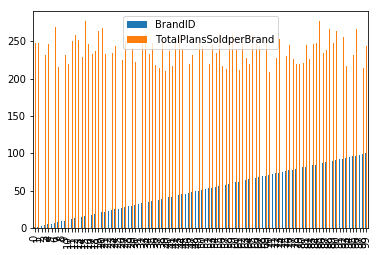

In [62]:
#plot df_merged_grouped1 dataframe(for entire dataframe)
df_merged_grouped1.plot.bar()

In [63]:
#Increasing the size of the graph
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (40,20)

In [64]:
#making the plot outputs appear and be stored within the notebook
%matplotlib inline

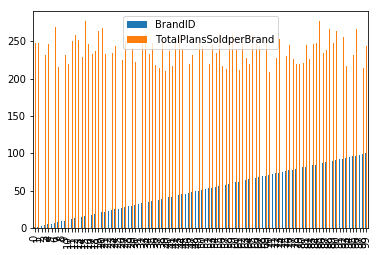

In [65]:
#plot dataframe
df_merged_grouped1.plot.bar()

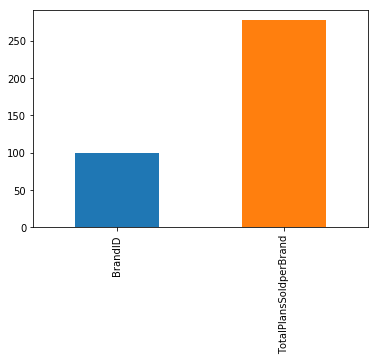

In [68]:
#plot df_max dataframe(to find the brand_id and total number of sales)
df_max.plot.bar()

In [46]:
#making the plot outputs appear and be stored within the notebook
%matplotlib inline

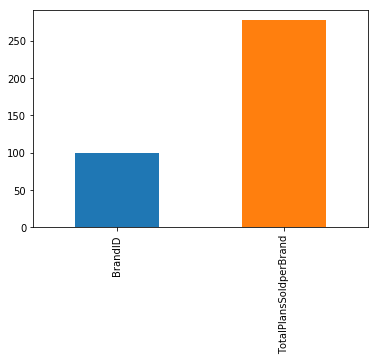

In [67]:
#plot dataframe
df_max.plot.bar()